Shape: (3597, 14)
   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     1.6      1143.00     106.0  6.291887         825.25     96.0   
1     1.2      1043.75     100.0  5.121191         769.50     85.0   
2     1.1      1034.00      71.0  4.086652         715.50     50.0   
3     0.9       956.25      72.0  4.045717         713.25      NaN   
4     0.7       909.25      44.0  2.433638         615.00     57.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T         RH  \
0        985.50     86.0       1477.25       978.25  11.950  61.624999   
1       1031.25     70.0       1424.75       944.25  11.500  63.875000   
2       1085.00     55.0       1405.00       891.25  10.675  67.224998   
3       1098.50      NaN       1421.50       848.75   8.975  73.100000   
4       1237.00     49.0       1321.50       789.50  10.225  66.575000   

         AH            DateTime  
0  0.859344 2004-01-04 00:00:00  
1  0.865156 2004-01-04 01:00:00  
2  0.862988 20

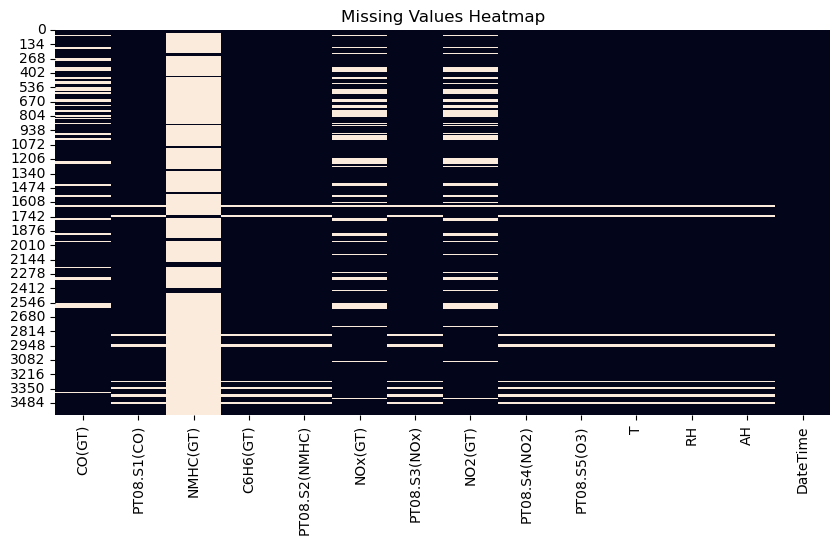

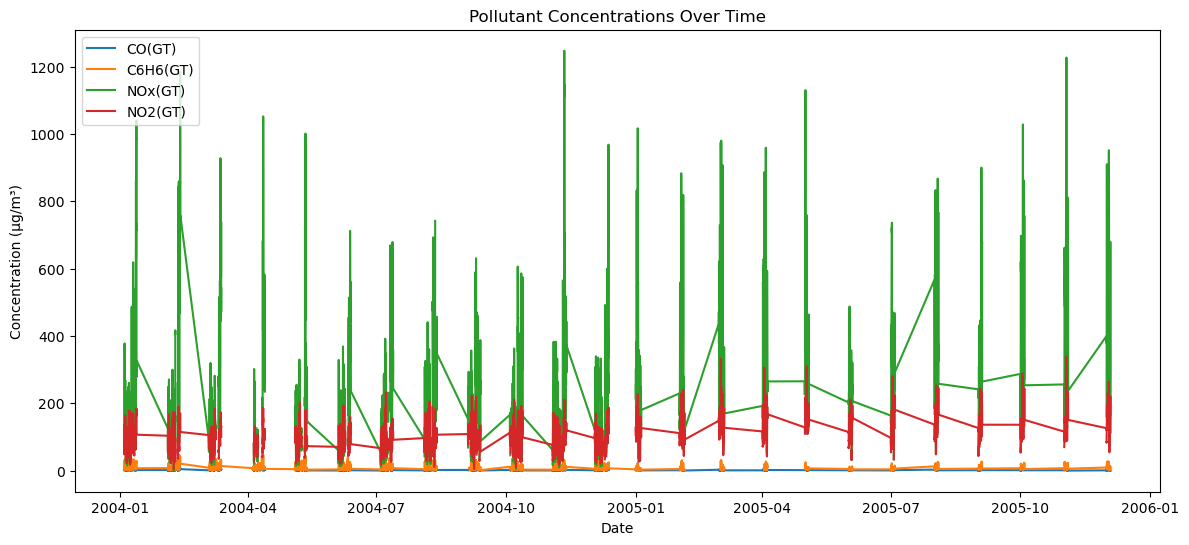

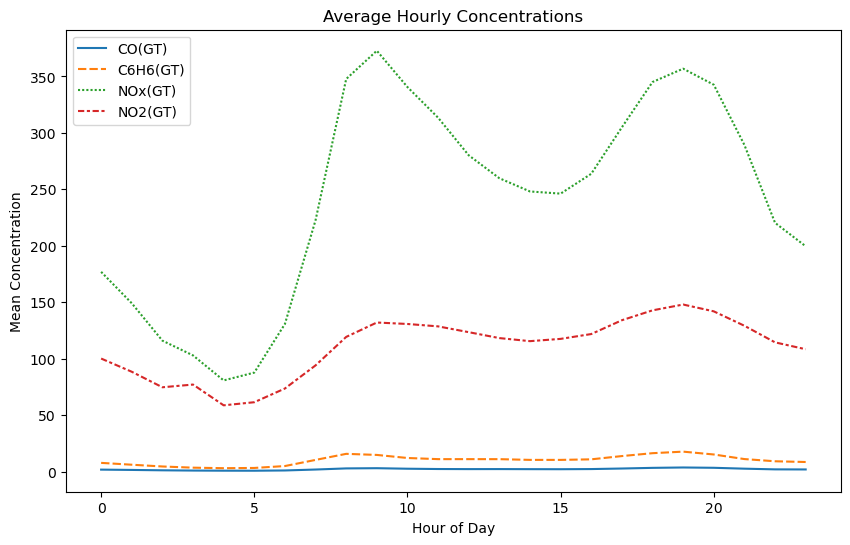

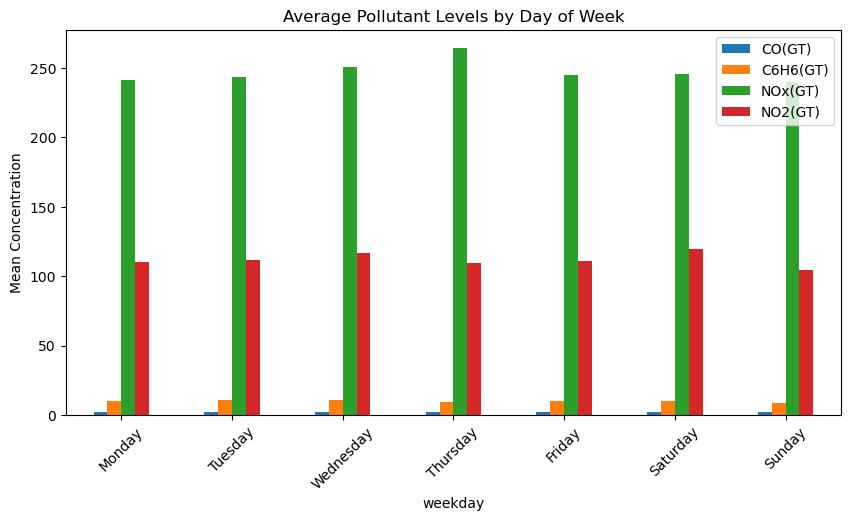

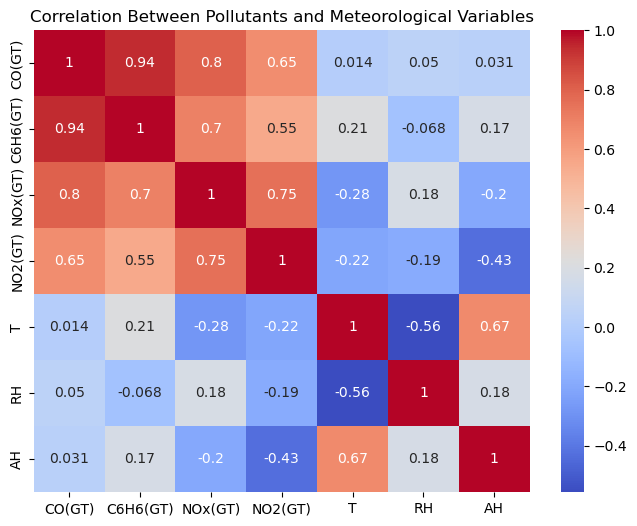

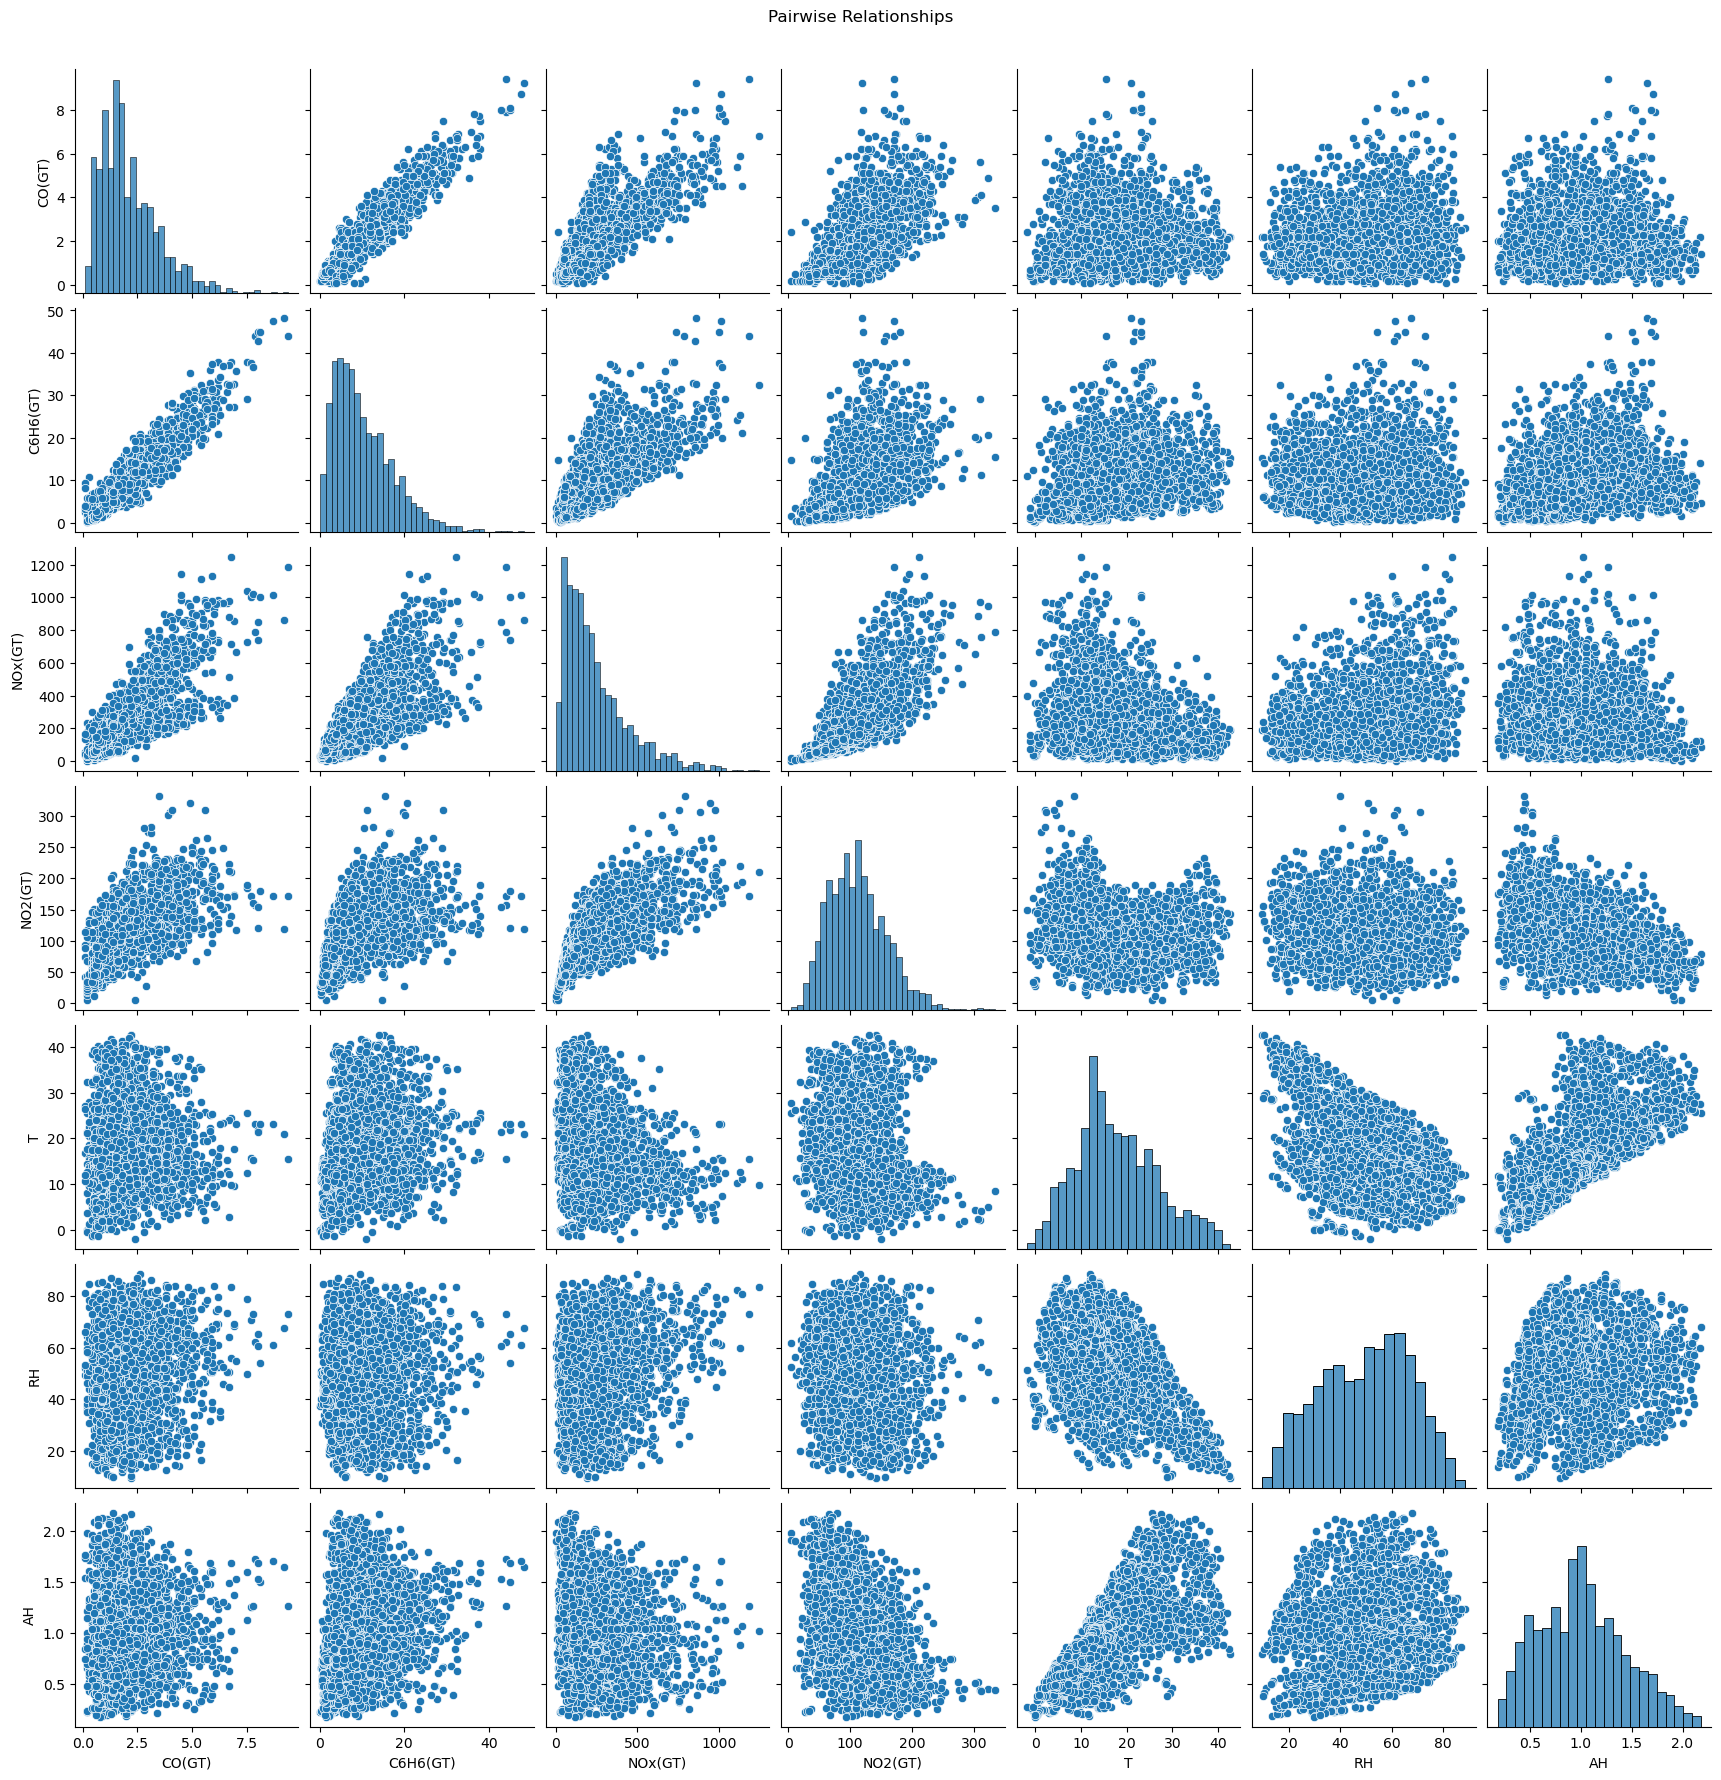

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_preprocessing import preprocess_data

# Load + basic cleaning (DateTime merge, -200 -> NaN, decimals)
# For EDA we keep NaNs so we can visualise missingness.
df = preprocess_data(
    path="air+quality/AirQualityUCI.xlsx",
    missing_strategy="none",
    add_time_features_flag=False,
    normalize=False,
)

print("Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe().T)

# Missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Time-series of pollutant concentrations
plt.figure(figsize=(14, 6))
for p in pollutants:
    plt.plot(df['DateTime'], df[p], label=p)
plt.legend()
plt.title("Pollutant Concentrations Over Time")
plt.xlabel("Date")
plt.ylabel("Concentration (µg/m³)")
plt.show()

# Hour-of-day patterns
df['hour'] = df['DateTime'].dt.hour
hourly_means = df.groupby('hour')[pollutants].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_means)
plt.title("Average Hourly Concentrations")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Concentration")
plt.show()

# Weekday patterns (use names for nicer plots)
df['weekday'] = df['DateTime'].dt.day_name()
weekly_means = df.groupby('weekday')[pollutants].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

weekly_means.plot(kind='bar', figsize=(10, 5))
plt.title("Average Pollutant Levels by Day of Week")
plt.ylabel("Mean Concentration")
plt.xticks(rotation=45)
plt.show()

# Correlation between pollutants and meteorology
corr = df[pollutants + ['T', 'RH', 'AH']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants and Meteorological Variables")
plt.show()

# Pairwise relationships
sns.pairplot(
    df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']].dropna()
)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()
